In [44]:
%matplotlib inline

In [45]:
# Helper functions
def FindCentroid(cluster):
    try: return (sum([i[0] for i in cluster])/len(cluster),sum([i[1] for i in cluster])/len(cluster))
    except: ""

def MergeClusters(clusters, closest_clusters):
    new_cluster = []
    
    for c in closest_clusters:       
        clusters.remove(c)
        new_cluster.append(c)
        
    clusters.append(Flatten(new_cluster))
    
    return clusters

def Flatten(item):
    return [y for x in item for y in x]

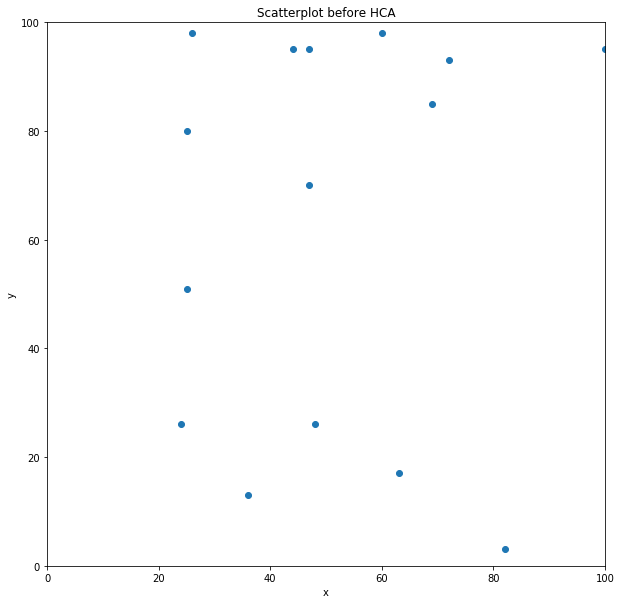

In [46]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 13 12:46:45 2018

@author: Tim Chow
"""
import matplotlib
import matplotlib.pyplot as plt
from random import randint
from scipy.spatial import distance

# Hierarchical Clustering Algorithm (HCA)
# Start with n points where all points are clusters of their own

NUM_FINAL_CLUSTERS = 4
NUM_START_CLUSTERS = 15
clusters = [[(randint(1,100),(randint(1,100)))] for p in range(NUM_START_CLUSTERS)]


# Merge clusters are that closest to each other
# Stop when there is one cluster left
current_cluster_idx = 0
iterating_cluster_idx = 0
closest_clusters = []

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Scatterplot before HCA")
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.scatter([x[0] for x in Flatten(clusters)],[x[1] for x in Flatten(clusters)])
plt.axis([0, 100, 0, 100])
plt.show()

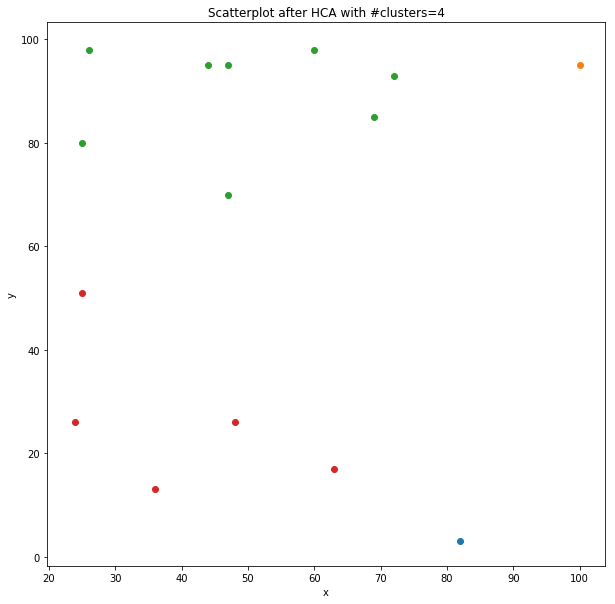

In [47]:
while(len(clusters) > NUM_FINAL_CLUSTERS):
    if len(closest_clusters) == 0:
        closest_clusters = [clusters[0],clusters[1]]
    
    for current_cluster_idx in range(0,len(clusters)):
        current_cluster = clusters[current_cluster_idx]
        current_cluster_centroid = FindCentroid(current_cluster)
        
        for iterating_cluster_idx in range(0,len(clusters)):
            if (current_cluster_idx == iterating_cluster_idx): continue
        
            iterating_cluster = clusters[iterating_cluster_idx]
            iterating_cluster_centroid = FindCentroid(iterating_cluster)
            
            closest_distance = distance.euclidean(FindCentroid(closest_clusters[0]), FindCentroid(closest_clusters[1]))
            current_distance = distance.euclidean(current_cluster_centroid, iterating_cluster_centroid)
            
            if (current_distance < closest_distance):
                closest_clusters = [current_cluster,iterating_cluster]
    
    clusters = MergeClusters(clusters, closest_clusters)
    closest_clusters = [clusters[0],clusters[1]]

#scatter plot for as many clusters there are left
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Scatterplot after HCA with #clusters={}".format(NUM_FINAL_CLUSTERS))
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(0,len(clusters)):
    plt.scatter([x[0] for x in (clusters)[i]],[x[1] for x in (clusters)[i]])

plt.show()